In [27]:
import matplotlib.pyplot as plt
import numpy as np

## 問題35

In [26]:
def try_coin_toss(n, p = 0.5) -> list[int]:
  """
  二項分布に従う乱数をn回発生させ、i回目までに表の生じる相対頻度の列を返す
  """

  res = np.random.binomial(1, p, n)
  return [sum(res[:i]) / i  for i in range(1, n + 1)]

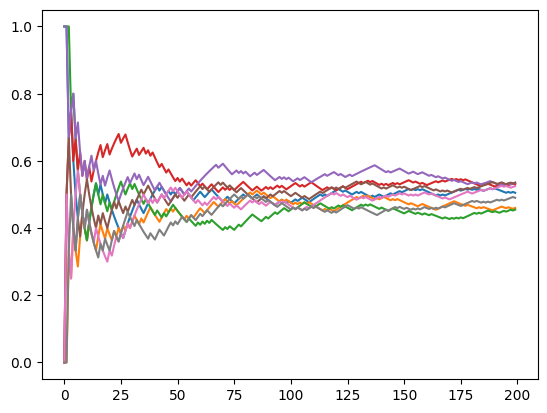

In [39]:
n = 200
for i in range(8):
  res = try_coin_toss(n)
  plt.plot(range(n), res)
  plt.ylim(-0.05, 1.05)

## 問題36

In [99]:
def clt(n, m, dist_name, **params) -> list[int]:
  """
  n個の確率変数列の標準化部分和をm回計算して返す
  """

  def norm(n, **params):
    mu = params['loc']
    sigma = params['scale']
    return np.random.normal(loc=params['loc'], scale=params['scale'], size=n), mu, sigma

  def exp(n, **params):
    mu = sigma = 1.0 / params['lamb']
    return np.random.exponential(scale=1.0 / params['lamb'], size=n), mu, sigma

  def binom(n, **params):
    mu = params['p']
    sigma = np.sqrt(params['p'] * (1 - params['p']))
    return np.random.binomial(n=1, p=params['p'], size=n), mu, sigma

  def pois(n, **params):
    mu = params['lamb']
    sigma = np.sqrt(params['lamb'])
    return np.random.poisson(lam=params['lamb'], size=n), mu, sigma

  def chis(n, **params):
    mu = params['df']
    sigma = 2 * params['df']
    return np.random.chisquare(df=params['df'], size=n), mu, sigma

  dists = {
      'norm': norm,
      'exp': exp,
      'binom': binom,
      'pois': pois,
      'chis': chis
  }

  res = []
  for _ in range(m):
    rand_vars, mu, sigma = dists[dist_name](n, **params)
    standardized = (sum(rand_vars) - n * mu) / np.sqrt(n) / sigma
    res.append(standardized)

  return res

In [92]:
def draw(n, m):
  norm = clt(n, m, 'norm', loc=0.0, scale=1.0)
  exp = clt(n, m, 'exp', lamb=1.0)
  binom = clt(n, m, 'binom', p=0.1)
  pois = clt(n, m, 'pois', lamb=1.0)

  fig, ax = plt.subplots(2, 2)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  _ = ax[0, 0].hist(norm, bins=100, density=True)
  ax[0, 0].set_title('norm')
  _ = ax[0, 1].hist(exp, bins=100, density=True)
  ax[0, 1].set_title('exp')
  _ = ax[1, 0].hist(binom, bins=100, density=True)
  ax[1, 0].set_title('binom')
  _ = ax[1, 1].hist(pois, bins=100, density=True)
  ax[1, 1].set_title('pois')

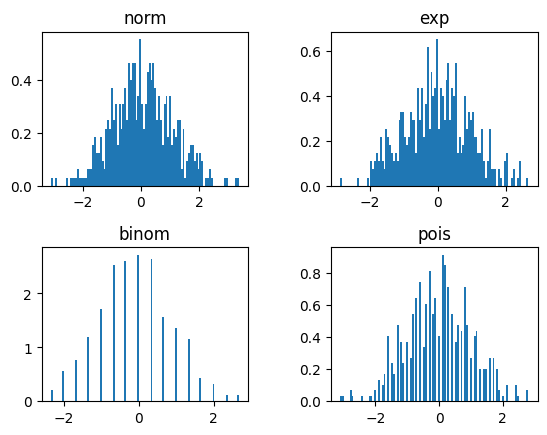

In [97]:
n = 100
m = 500
draw(n, m)

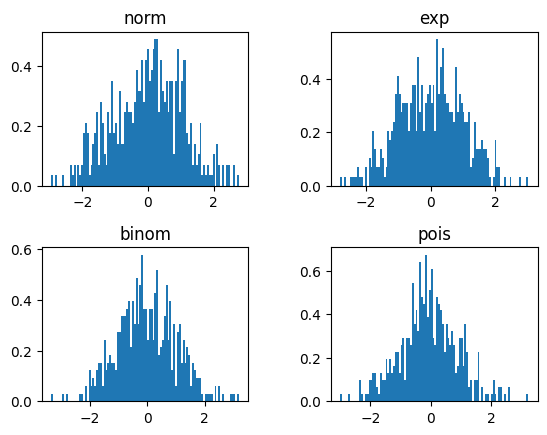

In [94]:
# nが大きい場合、大数の弱法則により各値が分布の平均値に確率収束する
n = 10000
m = 500
draw(n, m)

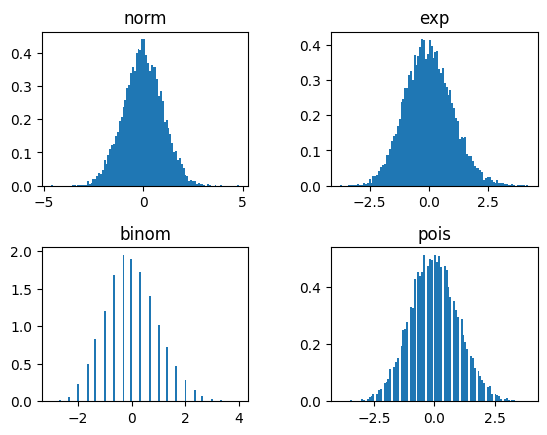

In [95]:
# mが大きい場合、中心極限定理より標準正規分布になる
n = 100
m = 10000
draw(n, m)

## 問題37

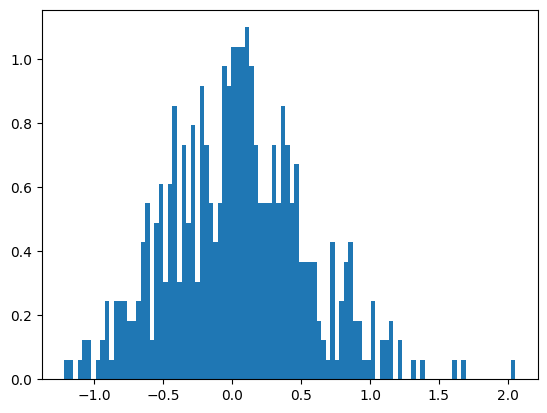

In [105]:
n = 100
m = 500
res = clt(n, m, 'chis', df=2)
_ = plt.hist(res, bins=100, density=True)